In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
import random
import copy
import json
from itertools import repeat

In [29]:
RANK = 1
kernel = np.array([[0, 1, 0],
                   [1, 3, 1],
                   [0, 1, 0]], dtype='uint8')

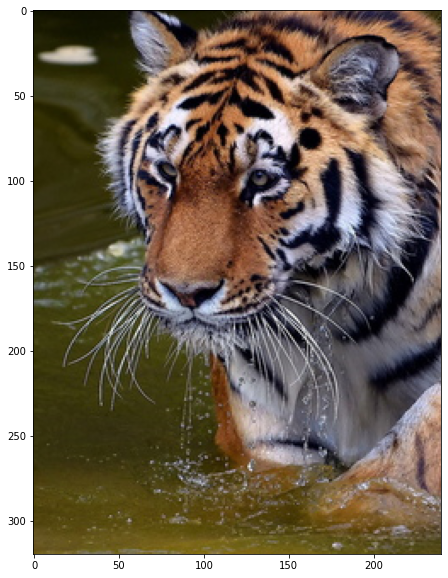

In [30]:
image = plt.imread('/content/original1.jpg')
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(image)

In [31]:
image.shape

(320, 240, 3)

Функция добавления шума

In [32]:
def sp_noise(image,prob):
  '''
  Add salt and pepper noise to image
  prob: Probability of the noise
  '''
  output = np.zeros(image.shape,np.uint8)
  thres = 1 - prob 
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          rdn = random.random()
          if rdn < prob:
              output[i][j] = 0
          elif rdn > thres:
              output[i][j] = 255
          else:
              output[i][j] = image[i][j]
  return output

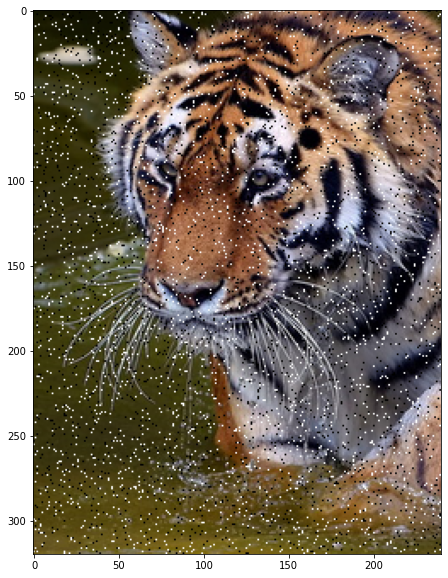

In [33]:
noise_img = sp_noise(image,0.03)
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(noise_img)

In [34]:
# [0,1,0]
# [1,3,1]
# [0,1,0]

def median_filter(image, kernel):
  output_img = np.copy(image)
  M,N = kernel.shape[0], kernel.shape[1]
  kernel = kernel.flatten()
  for i in range(image.shape[0]-M+1):
    for j in range(image.shape[1]-N+1):
      temp_rgb = image[i:i+M,j:j+N,:]
      for k in range(image.shape[2]):
        list = []
        tmp = temp_rgb[:,:,k].flatten()
        for t in range(len(tmp)):
          list.extend(repeat(tmp[t], kernel[t]))
        output_img[i,j,k] = np.sort(list, axis=None)[len(list)//2]
  return output_img

In [35]:
# [0,1,0]
# [1,3,1]
# [0,1,0]

def median_filter_rang(image, kernel, rang):
  output_img = np.copy(image)
  M,N = kernel.shape[0], kernel.shape[1]
  kernel = kernel.flatten()
  for i in range(image.shape[0]-M+1):
    for j in range(image.shape[1]-N+1):
      temp_rgb = image[i:i+M,j:j+N,:]
      for k in range(image.shape[2]):
        list = []
        tmp = temp_rgb[:,:,k].flatten()
        for t in range(len(tmp)):
          list.extend(repeat(tmp[t], kernel[t]))
        output_img[i,j,k] = np.sort(list, axis=None)[rang]
  return output_img

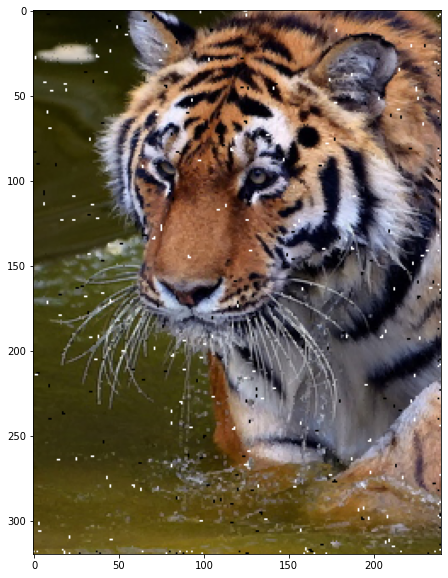

In [36]:
filter = median_filter(noise_img, kernel)
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(filter)

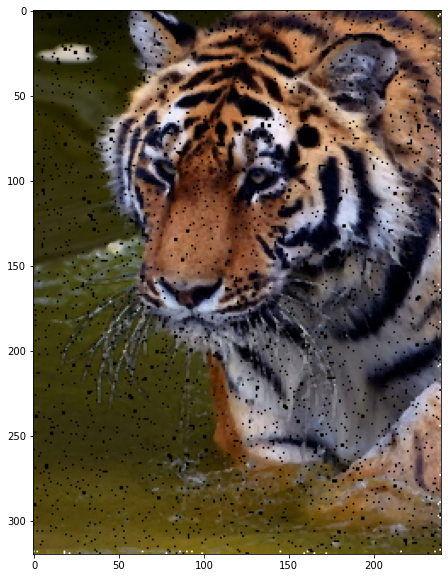

In [37]:
rang = median_filter_rang(noise_img, kernel, 1)
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(rang)

In [38]:
def rmse(orig, mod):
    return np.sqrt(np.mean((orig - mod) ** 2))

In [39]:
rang_list = [0,1,2,3,4,5,6]
channel = [0, 1, 2]
for i in rang_list:
  rang_image = median_filter_rang(image, kernel, i)
  mse = 0
  for j in channel:
    mse += np.mean((image[:,:,j] - rang_image[:,:,j])**2)
  print("RMSE: ", mse/3, ", rang: ", i)

RMSE:  70.06547309027776 , rang:  0
RMSE:  66.225859375 , rang:  1
RMSE:  66.63979166666667 , rang:  2
RMSE:  67.40797309027778 , rang:  3
RMSE:  67.2988888888889 , rang:  4
RMSE:  68.61022569444445 , rang:  5
RMSE:  74.65546006944444 , rang:  6
